In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,AveragePooling2D #Fixed typo MaxPoooling2D to MaxPooling2D
from keras.datasets import cifar10

In [2]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

<ipython-input-5-97e6123669e8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


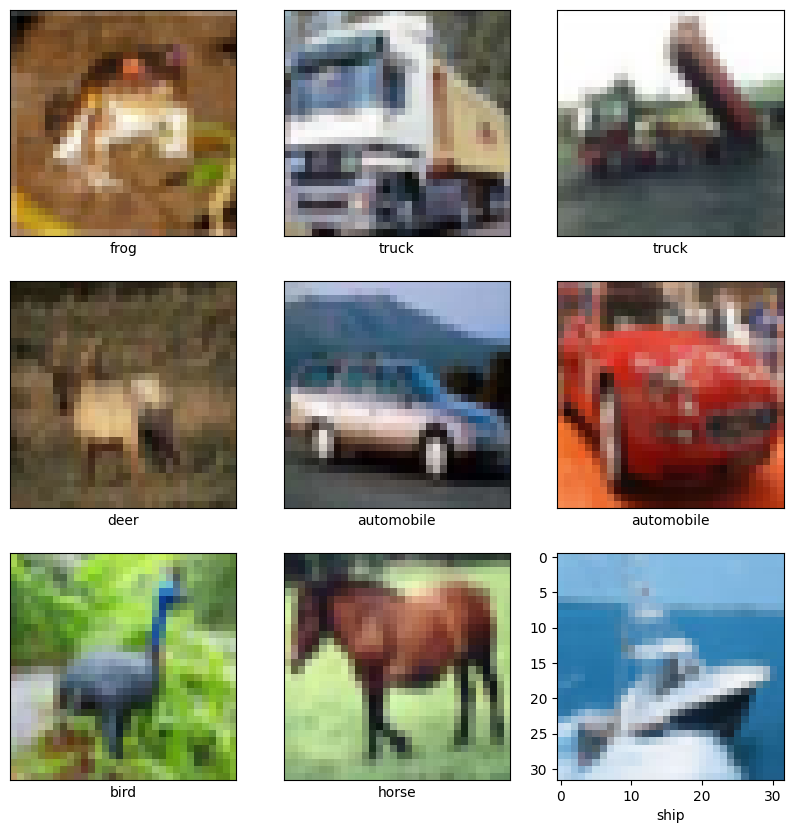

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [6]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


#Normalize it between 0 and 1

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # 10 output classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 59ms/step - accuracy: 0.3314 - loss: 1.7861 - val_accuracy: 0.5585 - val_loss: 1.2088
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.5792 - loss: 1.1845 - val_accuracy: 0.6168 - val_loss: 1.0993
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 59ms/step - accuracy: 0.6426 - loss: 1.0140 - val_accuracy: 0.6767 - val_loss: 0.9238
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 56ms/step - accuracy: 0.6880 - loss: 0.8888 - val_accuracy: 0.6831 - val_loss: 0.9216
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.7143 - loss: 0.8084 - val_accuracy: 0.6813 - val_loss: 0.9124
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 57ms/step - accuracy: 0.7412 - loss: 0.7369 - val_accuracy: 0.6847 - val_loss: 0.9085
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - accuracy: 0.7560 - loss: 0.6929 - val_accuracy: 0.7160 - val_loss: 0.8250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.

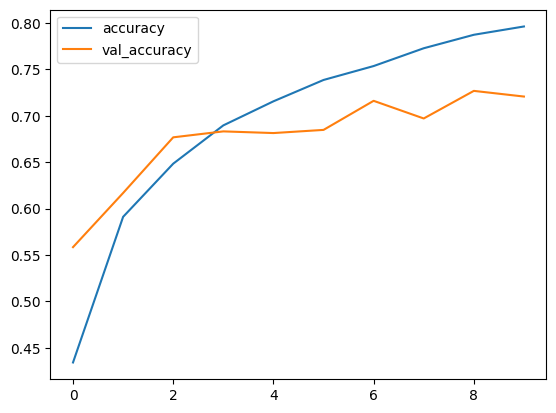

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

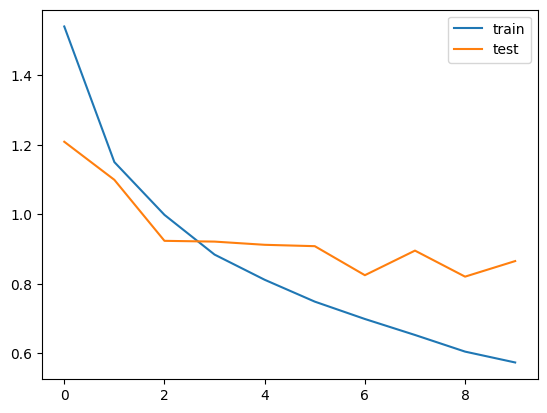

In [13]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [14]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print(test_acc)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7206 - loss: 0.8609
0.7206000089645386
0.8656535148620605


In [15]:
prediction=model.predict(X_test)
predictedclass=prediction.argmax(axis=1)
print(predictedclass[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
[3 8 8 0 6 6 1 6 3 9]


#Prediction on unseen data

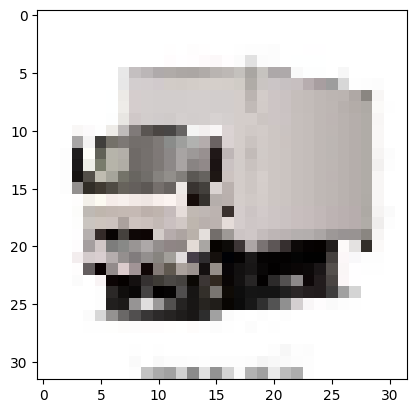

In [16]:
import cv2
test_img=cv2.imread('/content/truck.jfif')
test_img=cv2.resize(test_img,(32,32))
test_img=test_img/255.0
plt.imshow(test_img)

In [17]:
test_input=test_img.reshape((1,32,32,3))
predictions=model.predict(test_input)
predicted_class=predictions.argmax(axis=1)
print(predicted_class)
print(class_names[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[9]
truck
